After nominal pass:
- Determine optimal #HCP from nominal associations
- Visualize expression regressed by covariates, check batch effect
- Maybe: Relative log-expression RLE plots

After permutation pass:
- check beta approximated permutation pval
- QTL TSS distance density plot
- Compare sig feature across ancestries, upsetR
- Venn graph for fetal vs PEC, GTEx
- Conditional pass

In [1]:
library(ggplot2)
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 1: Optimal number of HCP

#### Mixed ancestry

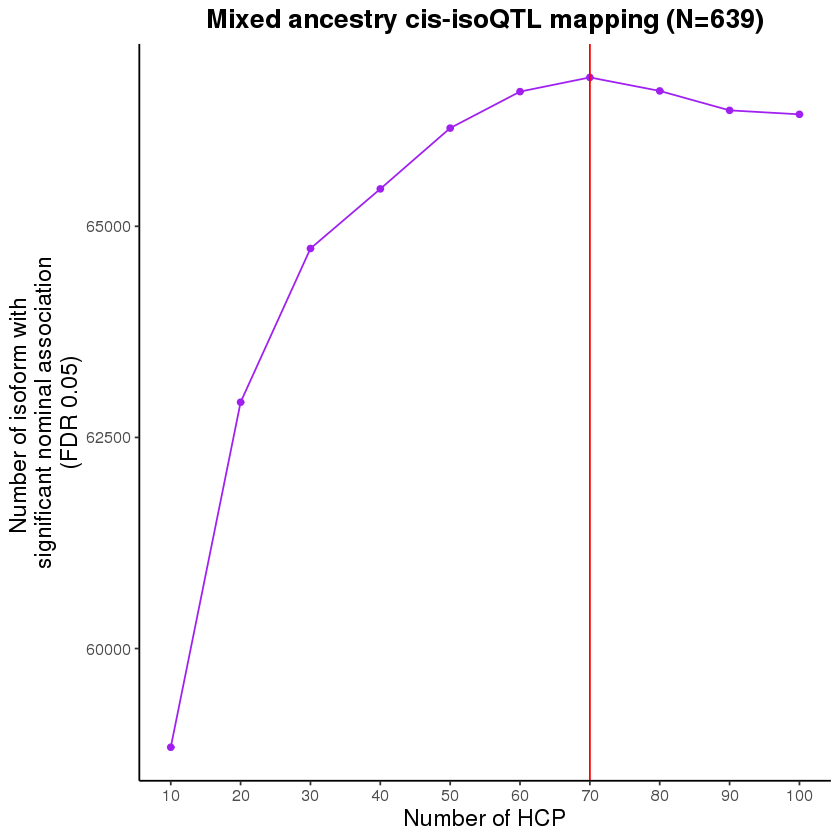

In [4]:
df <- data.frame("HCP" = seq(10, 100, 10),
                 "Count" = NA)
for (i in seq(10, 100, 10)) {
    df[i/10, "Count"] <- read.table(paste0("~/project-gandalm/isoform_twas/isoqtl_new/results/mixed_nominal_", i, 
                                           "hcp/significant_feature_count.txt"))[,1]
}

p1 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "purple") +
    geom_line(aes(x=HCP, y=Count), color = "purple") +
    scale_x_continuous(breaks = seq(0,110,by = 10)) +
    geom_vline(xintercept = 70, color = "red") +
    labs(title = "Mixed ancestry cis-isoQTL mapping (N=639)",
         x = "Number of HCP",
         y = "Number of isoform with \nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p1

In [6]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/mixed_nominal.png", p1, width = 6, height = 6)

#### EUR

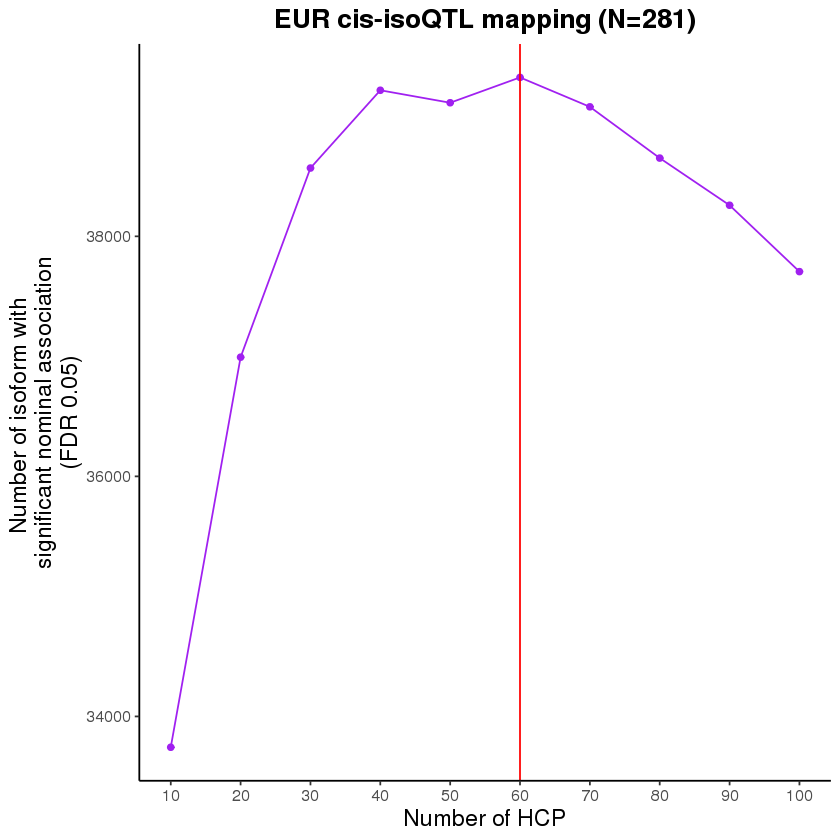

In [9]:
df <- data.frame("HCP" = seq(10, 100, 10),
                 "Count" = NA)
for (i in seq(10, 100, 10)) {
    df[i/10, "Count"] <- read.table(paste0("~/project-gandalm/isoform_twas/isoqtl_new/results/eur_nominal_", i, 
                                           "HCP/significant_feature_count.txt"))[,1]
}

p3 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "purple") +
    geom_line(aes(x=HCP, y=Count), color = "purple") +
    scale_x_continuous(breaks = seq(0,110,by = 10)) +
    geom_vline(xintercept = 60, color = "red") +
    labs(title = "EUR cis-isoQTL mapping (N=281)",
         x = "Number of HCP",
         y = "Number of isoform with \nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p3

In [10]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/eur_nominal.png", p3, width = 6, height = 6)

#### AMR

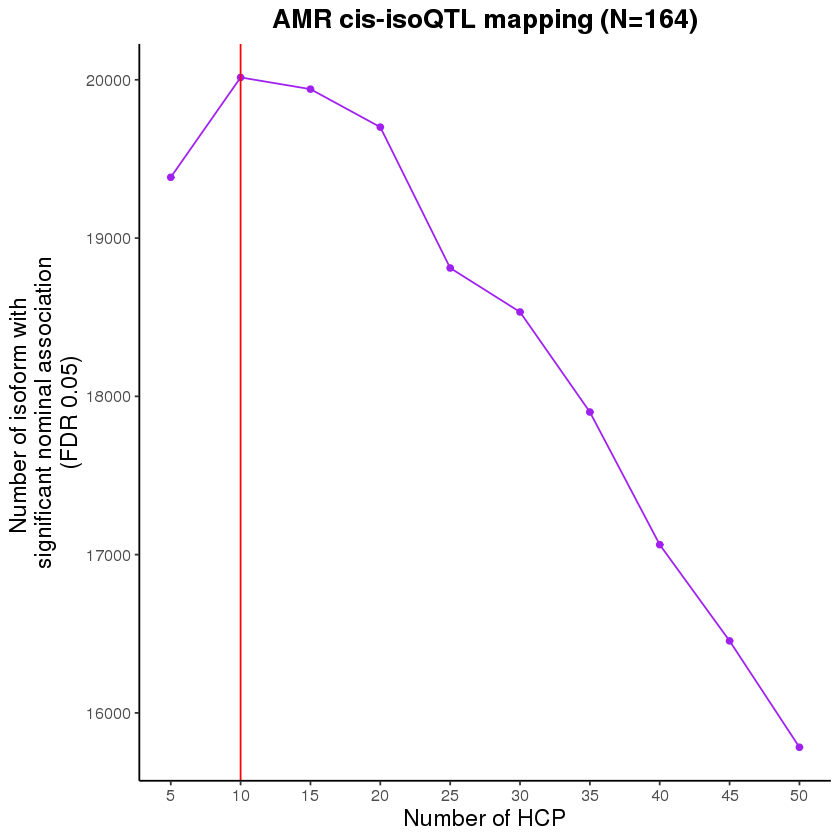

In [12]:
df <- data.frame("HCP" = seq(5, 50, 5),
                 "Count" = NA)
for (i in seq(5, 50, 5)) {
    df[i/5, "Count"] <- read.table(paste0("~/project-gandalm/isoform_twas/isoqtl_new/results/amr_nominal_", i, 
                                           "HCP/significant_feature_count.txt"))[,1]
}

p4 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "purple") +
    geom_line(aes(x=HCP, y=Count), color = "purple") +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_vline(xintercept = 10, color = "red") +
    labs(title = "AMR cis-isoQTL mapping (N=164)",
         x = "Number of HCP",
         y = "Number of isoform with \nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p4

In [13]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/amr_nominal.png", p4, width = 6, height = 6)

#### AFR

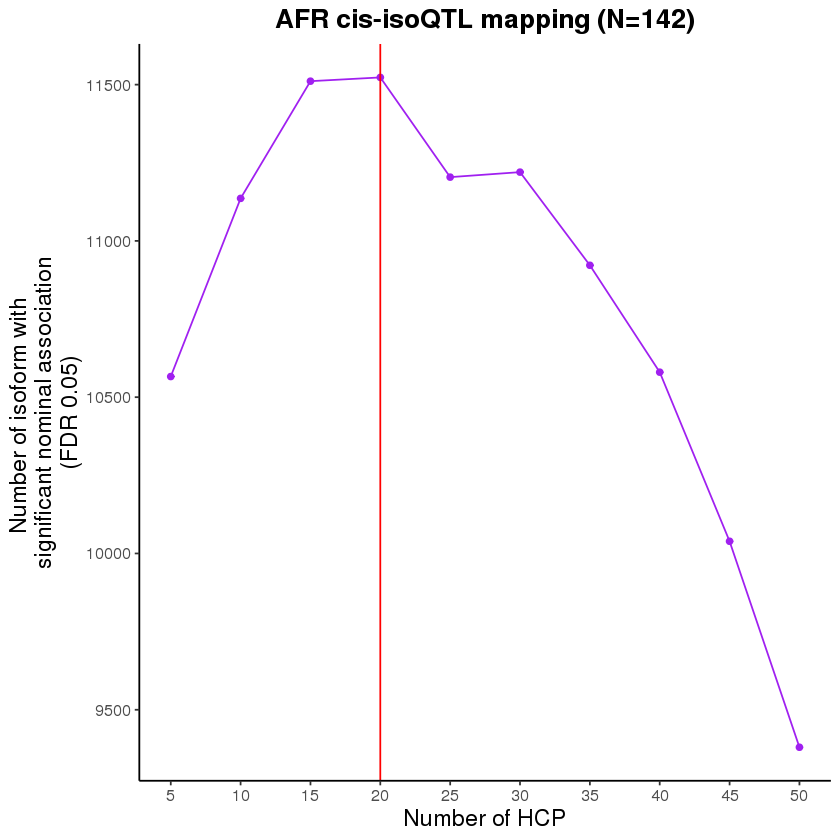

In [14]:
df <- data.frame("HCP" = seq(5, 50, 5),
                 "Count" = NA)
for (i in seq(5, 50, 5)) {
    df[i/5, "Count"] <- read.table(paste0("~/project-gandalm/isoform_twas/isoqtl_new/results/afr_nominal_", i, 
                                           "HCP/significant_feature_count.txt"))[,1]
}

p5 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "purple") +
    geom_line(aes(x=HCP, y=Count), color = "purple") +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_vline(xintercept = 20, color = "red") +
    labs(title = "AFR cis-isoQTL mapping (N=142)",
         x = "Number of HCP",
         y = "Number of isoform with \nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p5

In [15]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/afr_nominal.png", p5, width = 6, height = 6)

### 2: Isoform expression regression, check batch effects

#### Mixed ancestry

Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/tx.counts.processed.tsv", :
“Detected 639 column names but the data has 640 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/tx.counts.processed.noComBat.tsv", :
“Detected 639 column names but the data has 640 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


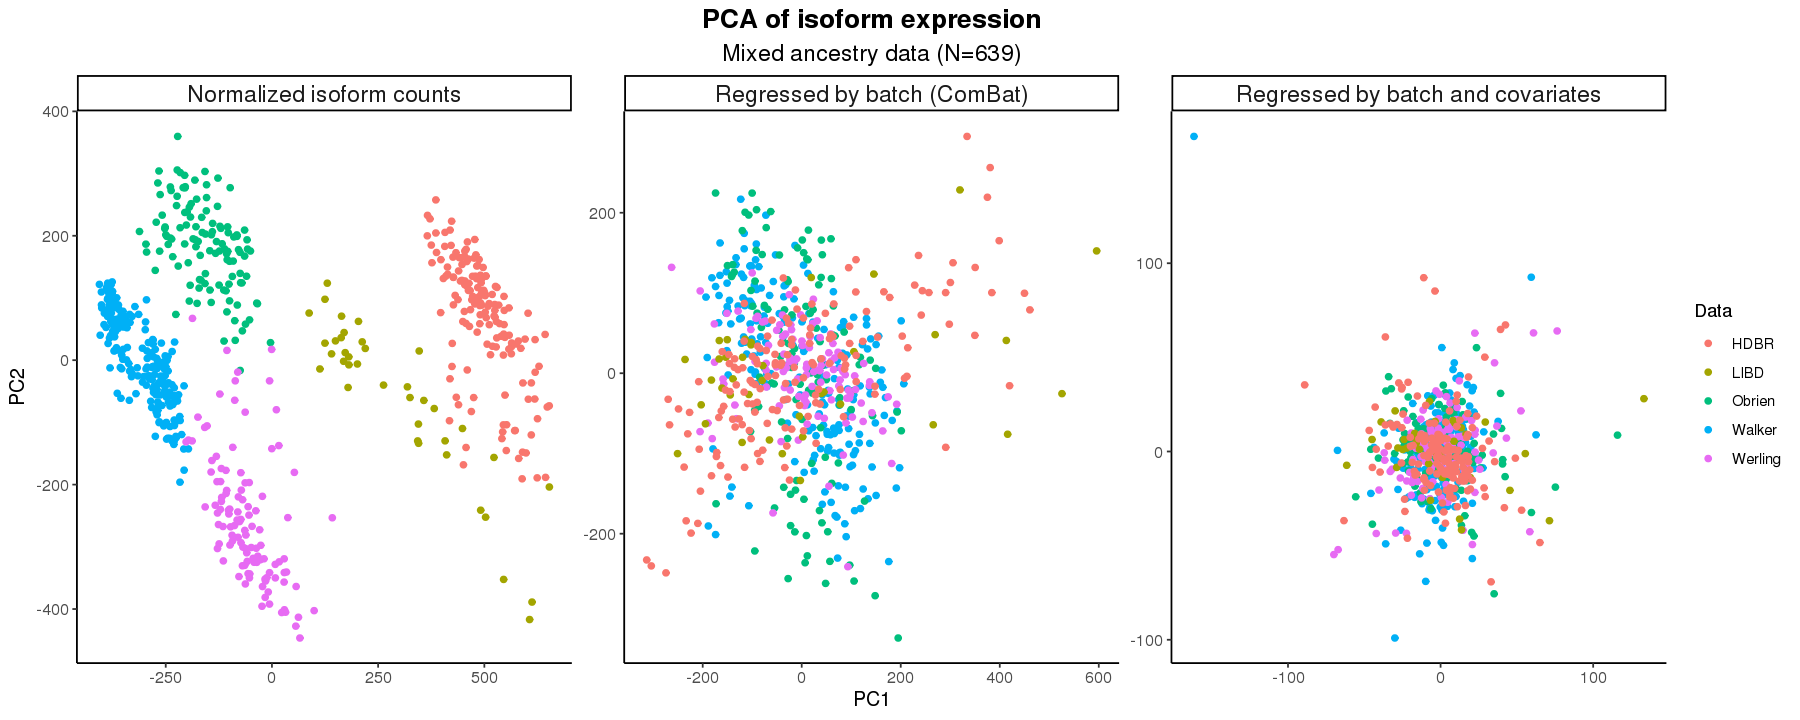

In [16]:
datExpr <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/tx.counts.processed.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]

datExpr_noCombat <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/tx.counts.processed.noComBat.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]

cov <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/data/70hcp_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

walker <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
hdbr <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")
libd <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

# center the data; use SVD to calculate PCs
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)
# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)
# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

options(repr.plot.width=15, repr.plot.height=6)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized isoform counts", dim(data2)[1]))
p2 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of isoform expression",
       subtitle = "Mixed ancestry data (N=639)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p2

In [17]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/mixed_regress.png", p2, width = 15, height = 6)

#### EUR

Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/eur/tx.counts.processed.tsv", :
“Detected 281 column names but the data has 282 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/eur/tx.counts.processed.noComBat.tsv", :
“Detected 281 column names but the data has 282 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


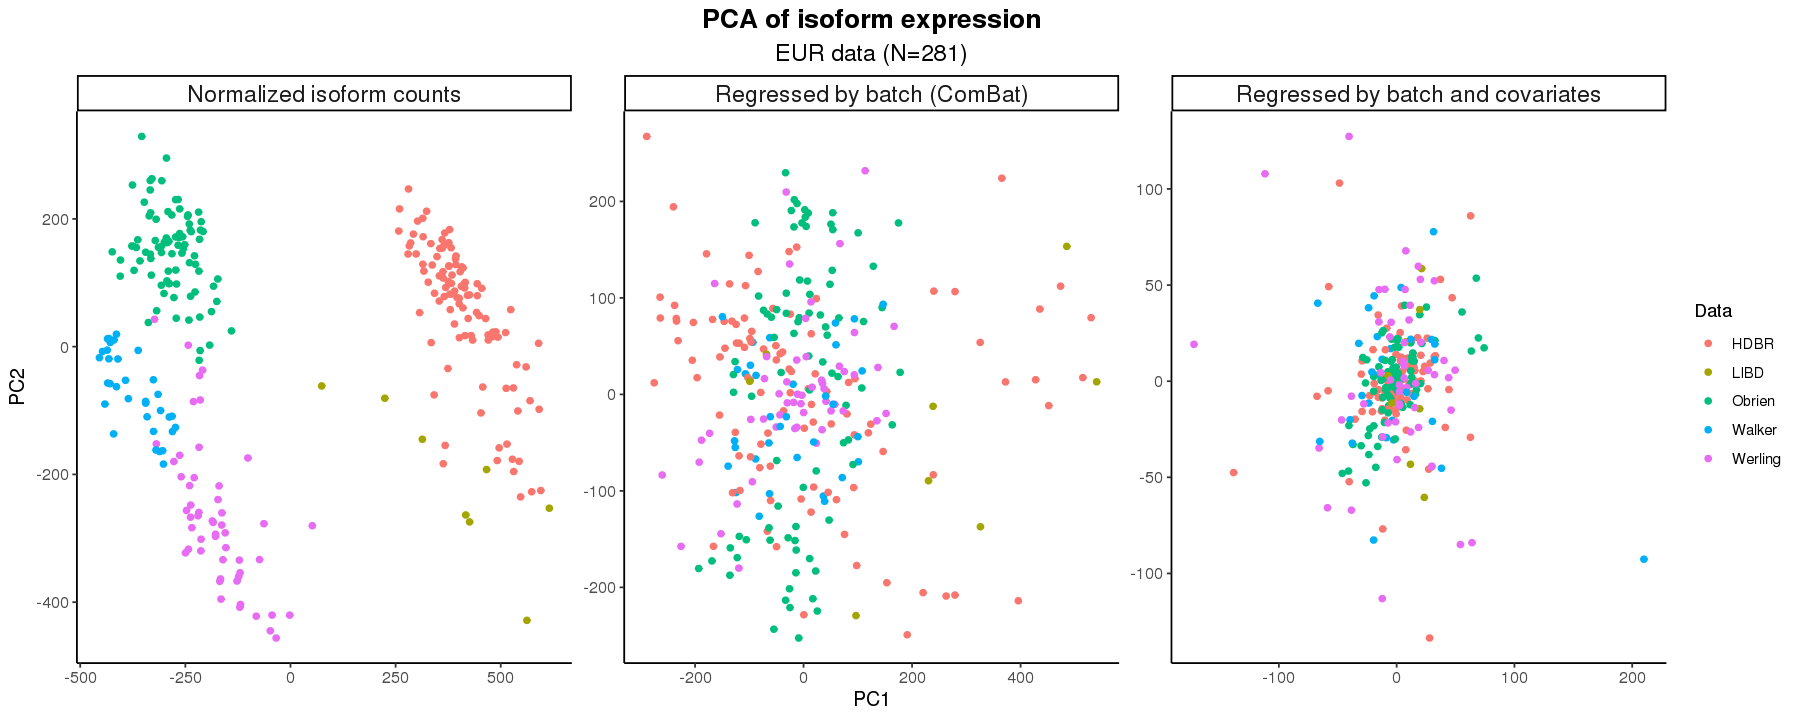

In [18]:
datExpr <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/eur/tx.counts.processed.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]

datExpr_noCombat <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/eur/tx.counts.processed.noComBat.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]

cov <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/data/eur/60HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

# center the data; use SVD to calculate PCs
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)
# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)
# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

options(repr.plot.width=15, repr.plot.height=6)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized isoform counts", dim(data2)[1]))
p6 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of isoform expression",
       subtitle = "EUR data (N=281)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p6

In [19]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/eur_regress.png", p6, width = 15, height = 6)

#### AMR

Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/amr/tx.counts.processed.tsv", :
“Detected 164 column names but the data has 165 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/amr/tx.counts.processed.noComBat.tsv", :
“Detected 164 column names but the data has 165 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


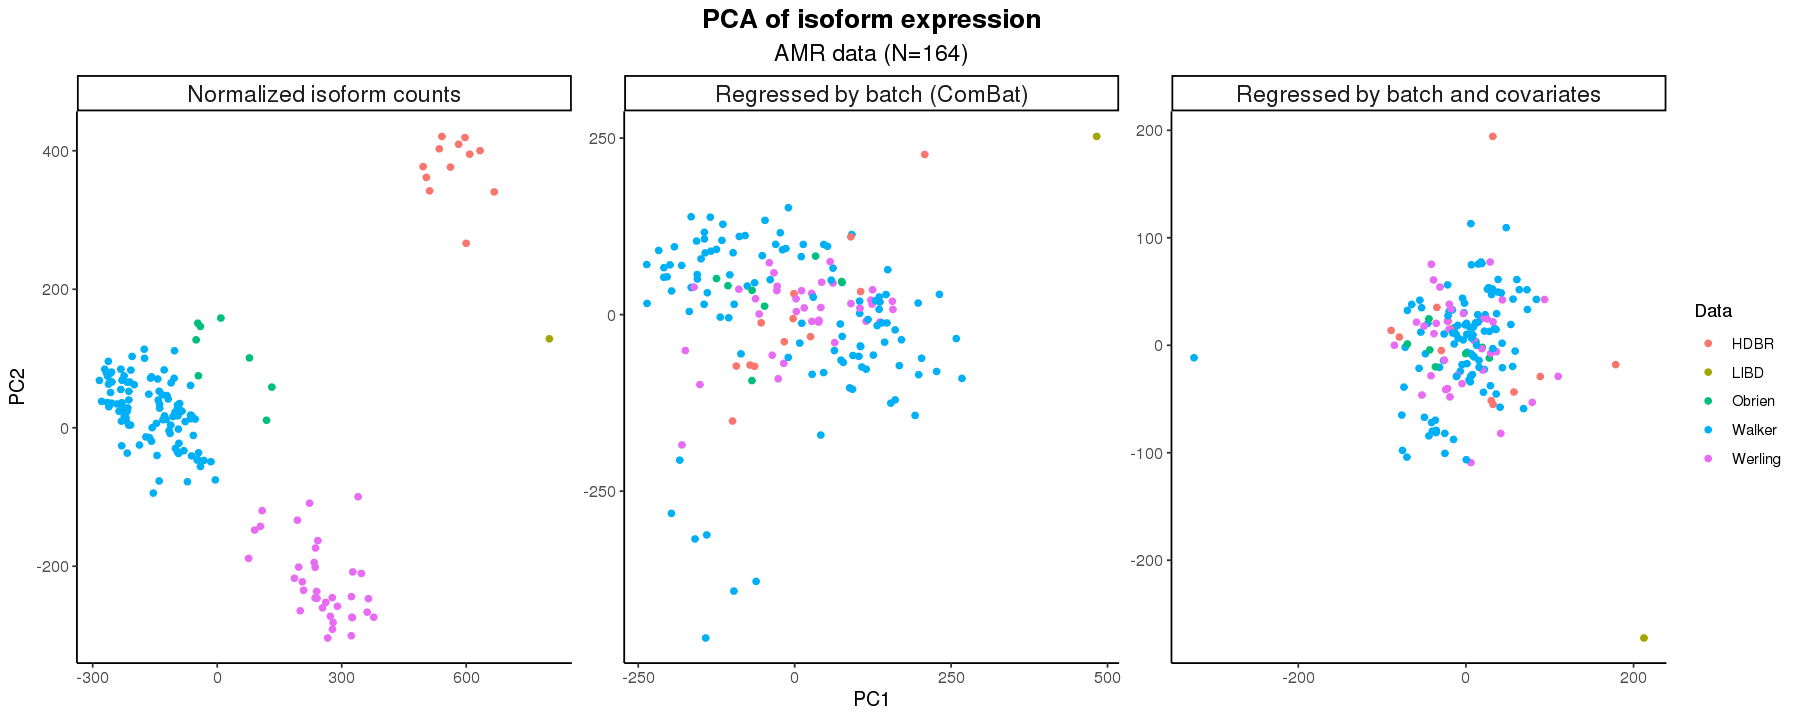

In [20]:
datExpr <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/amr/tx.counts.processed.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]

datExpr_noCombat <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/amr/tx.counts.processed.noComBat.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]

cov <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/data/amr/10HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

# center the data; use SVD to calculate PCs
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)
# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)
# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

options(repr.plot.width=15, repr.plot.height=6)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized isoform counts", dim(data2)[1]))
p7 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of isoform expression",
       subtitle = "AMR data (N=164)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p7

In [21]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/amr_regress.png", p7, width = 15, height = 6)

#### AFR

Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/afr/tx.counts.processed.tsv", :
“Detected 142 column names but the data has 143 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread("~/project-gandalm/isoform_twas/isoqtl_new/data/afr/tx.counts.processed.noComBat.tsv", :
“Detected 142 column names but the data has 143 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


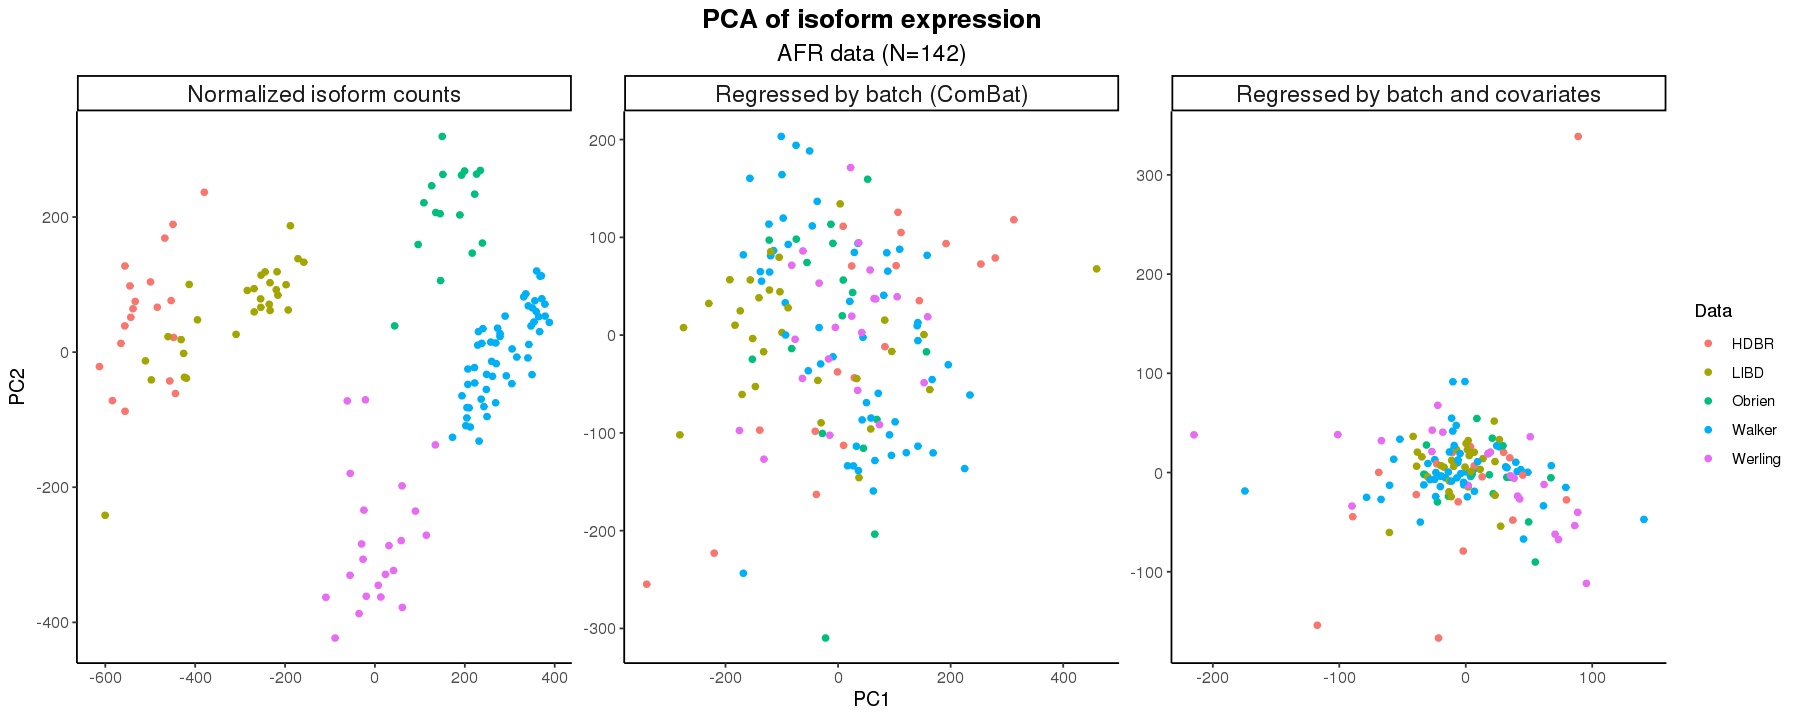

In [22]:
datExpr <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/afr/tx.counts.processed.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]

datExpr_noCombat <- fread("~/project-gandalm/isoform_twas/isoqtl_new/data/afr/tx.counts.processed.noComBat.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]

cov <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/data/afr/20HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

# center the data; use SVD to calculate PCs
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)
# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)
# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

options(repr.plot.width=15, repr.plot.height=6)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized isoform counts", dim(data2)[1]))
p8 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of isoform expression",
       subtitle = "AFR data (N=142)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p8

In [23]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/afr_regress.png", p8, width = 15, height = 6)

### 3: Check beta-approximated permutation pval

Warning message:
“Removed 1120 rows containing missing values (geom_point).”


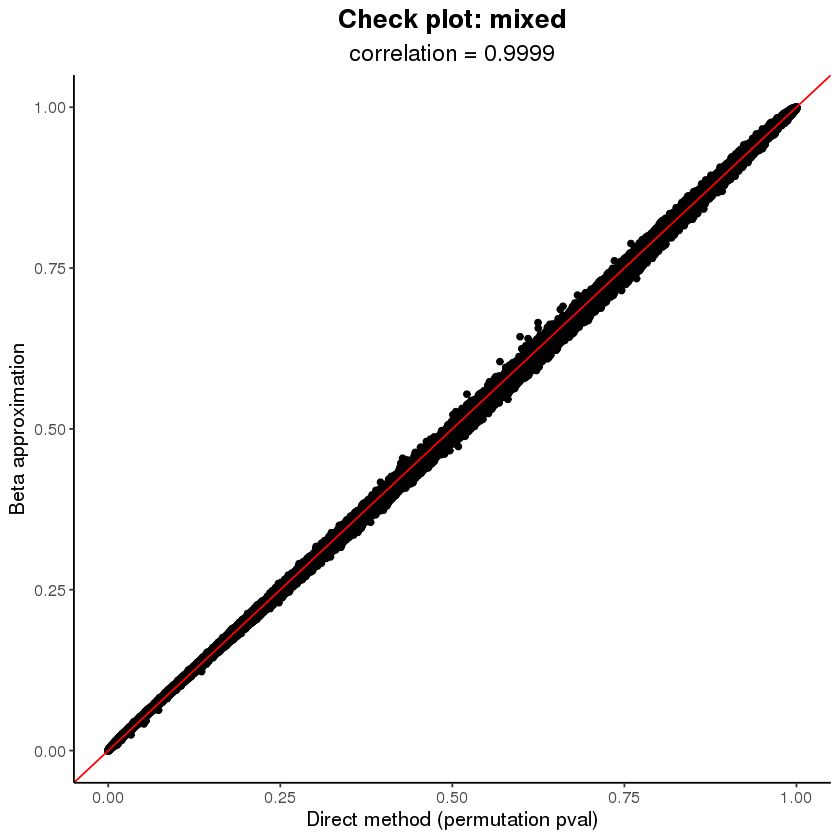

In [2]:
mixed <- fread("~/project-gandalm/isoform_twas/isoqtl_new/results/mixed_perm_70hcp/all.chunks.txt.gz", data.table=F)
colnames(mixed) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
p <- ggplot(mixed, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "Direct method (permutation pval)",
         y = "Beta approximation",
         title = "Check plot: mixed",
         subtitle = "correlation = 0.9999") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p

In [3]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/mixed_check.png", p, width = 6, height = 6)

Warning message:
“Removed 1120 rows containing missing values (geom_point).”


Warning message:
“Removed 1120 rows containing missing values (geom_point).”
Warning message:
“Removed 1120 rows containing missing values (geom_point).”


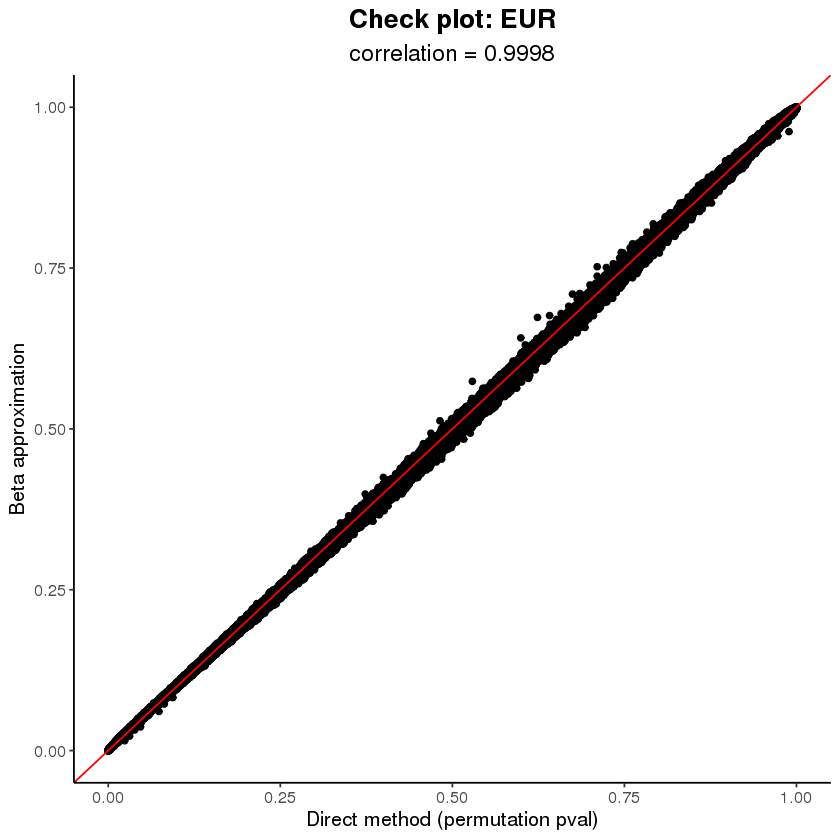

In [4]:
eur <- fread("~/project-gandalm/isoform_twas/isoqtl_new/results/eur_perm_60HCP/all.chunks.txt.gz", data.table=F)
colnames(eur) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
p1 <- ggplot(eur, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "Direct method (permutation pval)",
         y = "Beta approximation",
         title = "Check plot: EUR",
         subtitle = "correlation = 0.9998") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p1
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/eur_check.png", p1, width = 6, height = 6)

Warning message:
“Removed 1121 rows containing missing values (geom_point).”
Warning message:
“Removed 1121 rows containing missing values (geom_point).”


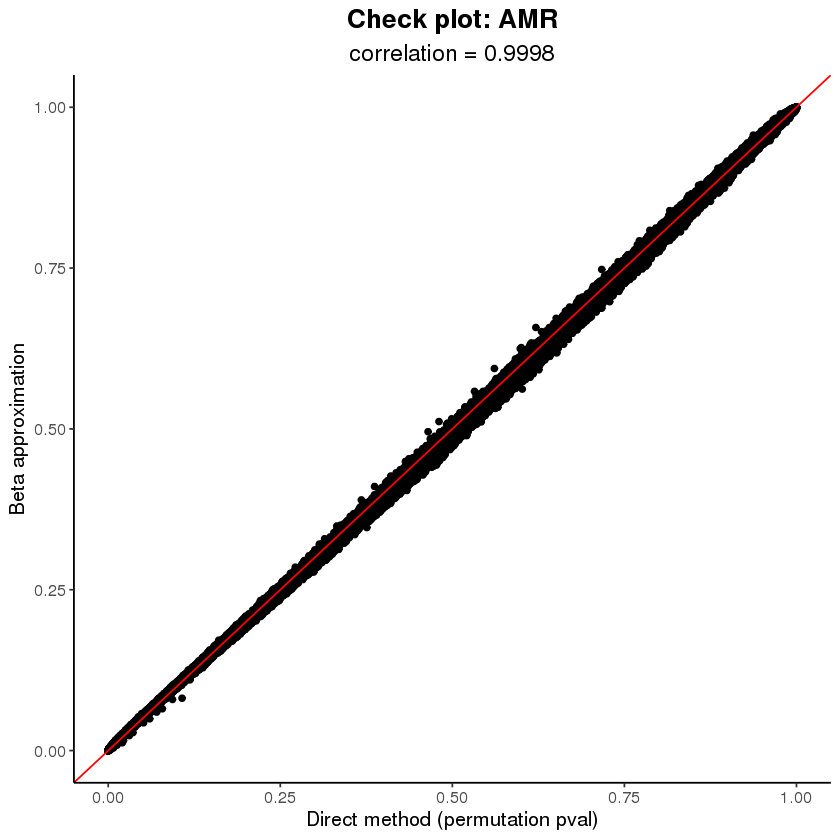

In [6]:
amr <- fread("~/project-gandalm/isoform_twas/isoqtl_new/results/amr_perm_10HCP/all.chunks.txt.gz", data.table=F)
colnames(amr) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
p2 <- ggplot(amr, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "Direct method (permutation pval)",
         y = "Beta approximation",
         title = "Check plot: AMR",
         subtitle = "correlation = 0.9998") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p2
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/amr_check.png", p2, width = 6, height = 6)

Warning message:
“Removed 1121 rows containing missing values (geom_point).”
Warning message:
“Removed 1121 rows containing missing values (geom_point).”


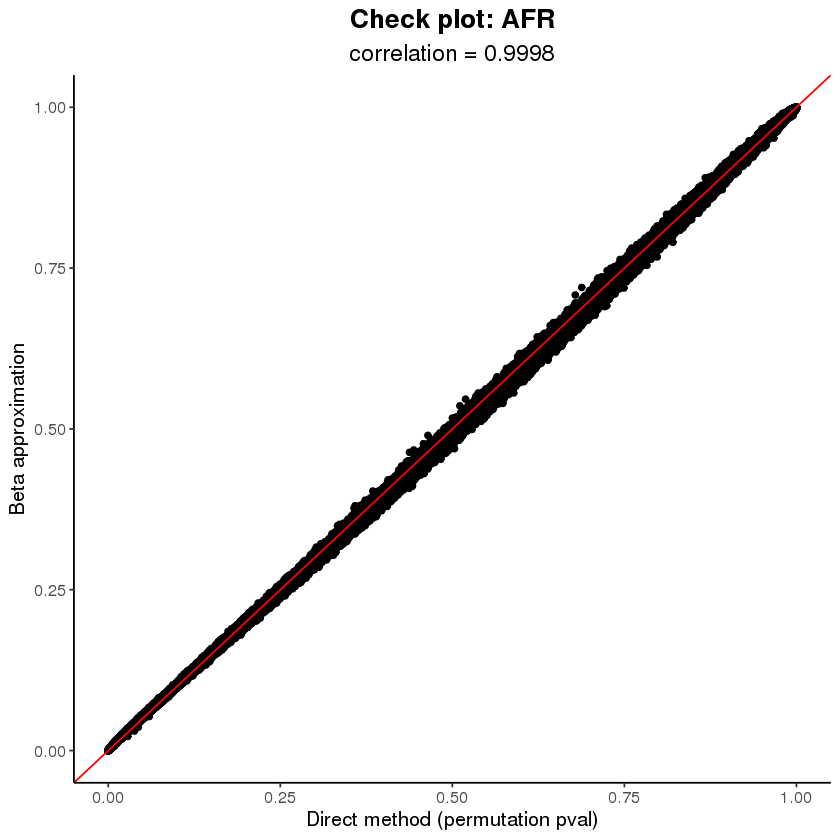

In [7]:
afr <- fread("~/project-gandalm/isoform_twas/isoqtl_new/results/afr_perm_20HCP/all.chunks.txt.gz", data.table=F)
colnames(afr) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
p3 <- ggplot(afr, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "Direct method (permutation pval)",
         y = "Beta approximation",
         title = "Check plot: AFR",
         subtitle = "correlation = 0.9998") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p3
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/afr_check.png", p3, width = 6, height = 6)

### 4: dTSS top isoQTL per isoGene (best beta-approximated permutation pval per isoGene)

In [10]:
mixed_sig <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/results/mixed_perm_70hcp/sig_pheno_gene.txt", header = T, stringsAsFactors = F)

In [11]:
head(mixed_sig)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,Gene
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENST00000002165.11_3,5683,1.04817,957.721,497.082,rs4896658,-47658,2.51027e-18,-0.819590,0.00009999,4.42093e-14,6.36565e-13,2.13663e-05,ENSG00000001036
2,ENST00000002501.11_2,4247,1.06970,487.005,466.211,rs78536691,14607,4.06163e-07,-0.459573,0.00119988,1.15645e-03,5.02548e-03,4.59054e-05,ENSG00000003249
3,ENST00000002596.6_3,7427,1.03914,931.724,494.730,rs73812247,-390754,1.71228e-06,-0.398336,0.00399960,5.16470e-03,1.90447e-02,2.11409e-05,ENSG00000002587
4,ENST00000003100.13_4,4221,1.06424,511.692,483.629,rs34040612,35125,3.14552e-15,-0.198963,0.00009999,2.69649e-11,3.07221e-10,4.27341e-05,ENSG00000001630
5,ENST00000003302.8_2,5184,1.03665,727.336,487.430,rs7126080,-21619,2.80239e-10,0.239669,0.00009999,1.77502e-06,1.21998e-05,2.67954e-05,ENSG00000048028
6,ENST00000003583.12_2,5651,1.02833,841.218,492.406,rs760969,5489,1.43168e-34,-0.611563,0.00009999,1.92542e-28,6.87108e-27,2.23529e-05,ENSG00000001460


In [12]:
dim(mixed_sig)

[1] 23081    14

In [13]:
mixed_sig <- mixed_sig %>% arrange(Gene, bpval)
top <- mixed_sig[!duplicated(mixed_sig$Gene),]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [14]:
head(top)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,Gene
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENST00000371582.8_3,6979,1.03503,1344.290,503.549,rs6063570,-116487,3.01182e-07,-0.338922,0.00119988,1.25570e-03,5.41788e-03,1.43979e-05,ENSG00000000419
2,ENST00000459772.5_2,7025,1.04323,691.123,489.904,rs11576078,17889,9.02339e-28,-0.601069,0.00009999,1.43160e-22,3.69723e-21,2.89989e-05,ENSG00000000460
6,ENST00000002165.11_3,5683,1.04817,957.721,497.082,rs4896658,-47658,2.51027e-18,-0.819590,0.00009999,4.42093e-14,6.36565e-13,2.13663e-05,ENSG00000001036
7,ENST00000514004.5_2,6256,1.02933,868.340,496.098,rs3736729,-30426,7.91105e-10,-0.211704,0.00009999,4.37455e-06,2.86206e-05,2.17488e-05,ENSG00000001084
10,ENST00000003583.12_2,5651,1.02833,841.218,492.406,rs760969,5489,1.43168e-34,-0.611563,0.00009999,1.92542e-28,6.87108e-27,2.23529e-05,ENSG00000001460
16,ENST00000374399.9_2,5648,1.05705,814.956,487.416,rs527567,-31172,1.49822e-11,-0.227335,0.00009999,1.02523e-07,8.15845e-07,2.60532e-05,ENSG00000001461


In [15]:
dim(top)

[1] 11527    14

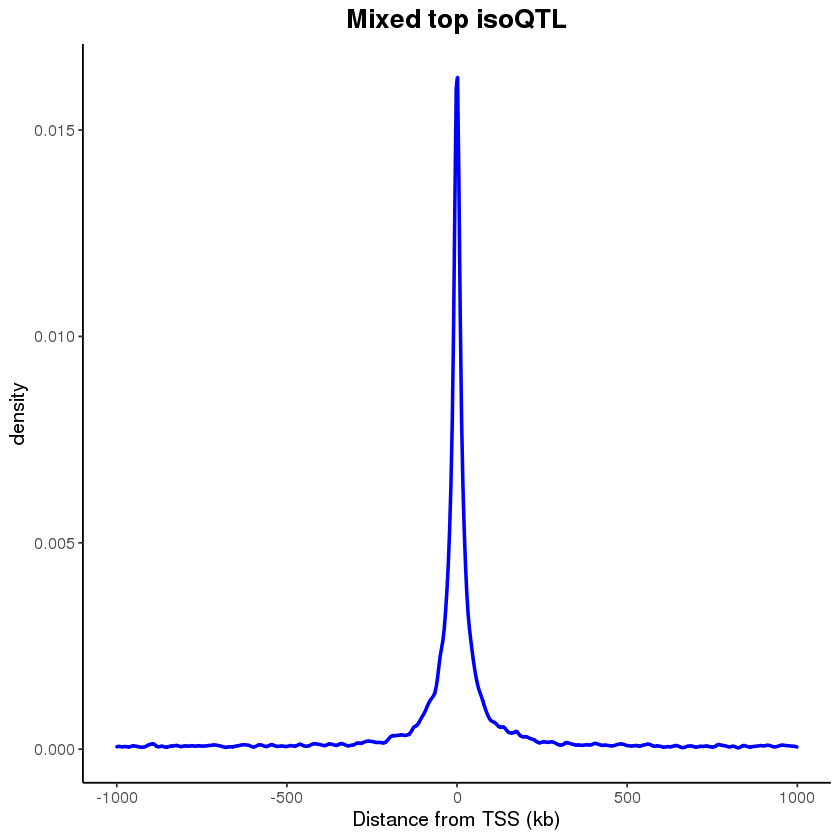

In [16]:
top$dist_kb <- top$dist/1000
p <- ggplot(top, aes(x = dist_kb)) +
    geom_density(color = "blue", size = 1) +
    labs(x = "Distance from TSS (kb)",
         title = "Mixed top isoQTL") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p

In [17]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/mixed_dist.png", p, height = 6, width = 6)

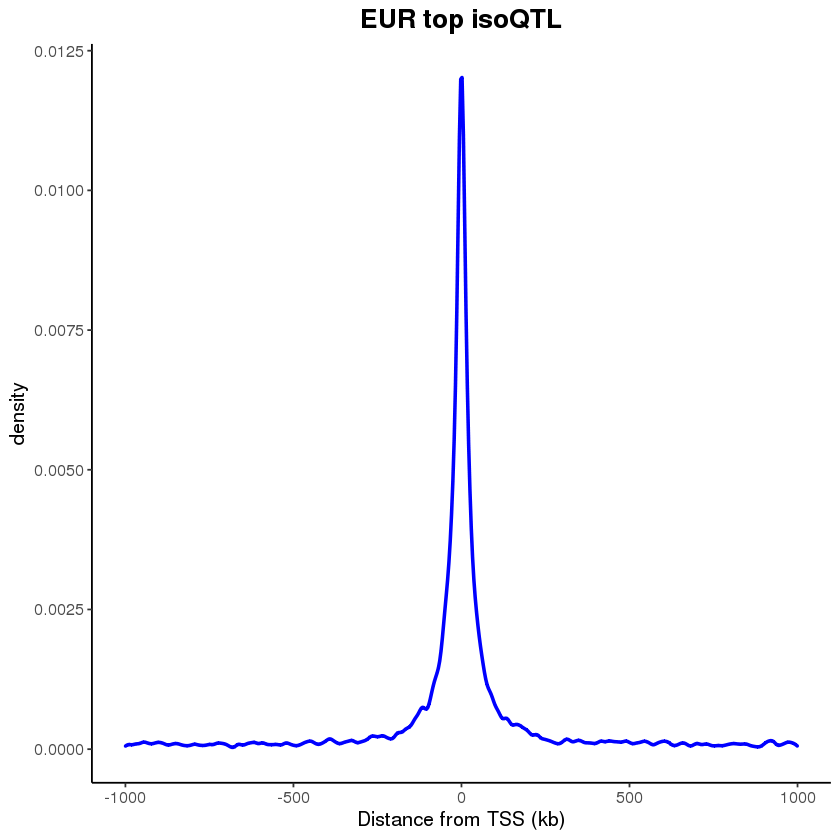

In [18]:
eur_sig <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/results/eur_perm_60HCP/sig_pheno.txt", header = T, stringsAsFactors = F)
tx2gene <- read.table("~/project-gandalm/isoform_twas/salmon/tx2gene_gencode_v33_noGeneVersion.tsv", header=T, stringsAsFactors=F)
eur_sig <- eur_sig %>% left_join(tx2gene, by=c("pid"="Tx"))
write.table(eur_sig, "~/project-gandalm/isoform_twas/isoqtl_new/results/eur_perm_60HCP/sig_pheno_gene.txt", col.names=T, row.names=F, sep="\t", quote=F)

eur_sig <- eur_sig %>% arrange(Gene, bpval)
eur_top <- eur_sig[!duplicated(eur_sig$Gene),]
eur_top$dist_kb <- eur_top$dist/1000
p1 <- ggplot(eur_top, aes(x = dist_kb)) +
    geom_density(color = "blue", size = 1) +
    labs(x = "Distance from TSS (kb)",
         title = "EUR top isoQTL") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p1
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/eur_dist.png", p1, height = 6, width = 6)

In [19]:
dim(eur_top)
length(unique(eur_sig$Gene))

[1] 6873   15

[1] 6873

[1] 4020

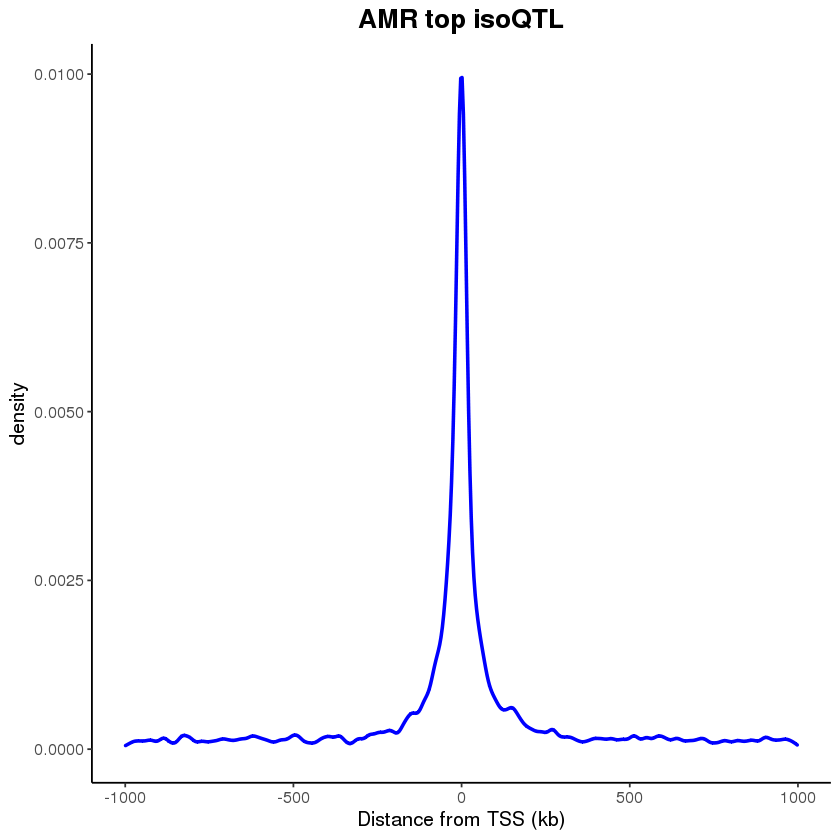

In [20]:
amr_sig <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/results/amr_perm_10HCP/sig_pheno.txt", header = T, stringsAsFactors = F)
amr_sig <- amr_sig %>% left_join(tx2gene, by=c("pid"="Tx"))
write.table(amr_sig, "~/project-gandalm/isoform_twas/isoqtl_new/results/amr_perm_10HCP/sig_pheno_gene.txt", col.names=T, row.names=F, sep="\t", quote=F)
length(unique(amr_sig$Gene))

amr_sig <- amr_sig %>% arrange(Gene, bpval)
amr_top <- amr_sig[!duplicated(amr_sig$Gene),]
amr_top$dist_kb <- amr_top$dist/1000
p2 <- ggplot(amr_top, aes(x = dist_kb)) +
    geom_density(color = "blue", size = 1) +
    labs(x = "Distance from TSS (kb)",
         title = "AMR top isoQTL") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p2
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/amr_dist.png", p2, height = 6, width = 6)

[1] 2792

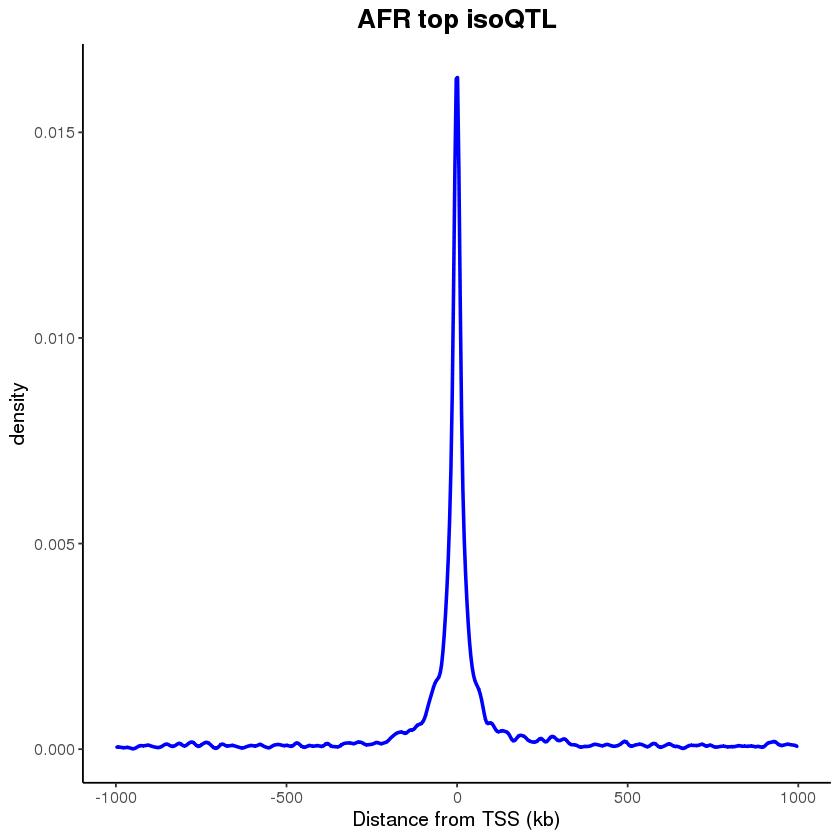

In [22]:
afr_sig <- read.table("~/project-gandalm/isoform_twas/isoqtl_new/results/afr_perm_20HCP/sig_pheno.txt", header = T, stringsAsFactors = F)
afr_sig <- afr_sig %>% left_join(tx2gene, by=c("pid"="Tx"))
write.table(afr_sig, "~/project-gandalm/isoform_twas/isoqtl_new/results/afr_perm_20HCP/sig_pheno_gene.txt", col.names=T, row.names=F, sep="\t", quote=F)
length(unique(afr_sig$Gene))

afr_sig <- afr_sig %>% arrange(Gene, bpval)
afr_top <- afr_sig[!duplicated(afr_sig$Gene),]
afr_top$dist_kb <- afr_top$dist/1000
p3 <- ggplot(afr_top, aes(x = dist_kb)) +
    geom_density(color = "blue", size = 1) +
    labs(x = "Distance from TSS (kb)",
         title = "AFR top isoQTL") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))
p3
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/afr_dist.png", p3, height = 6, width = 6)

### 5: Ancestry isoTx/isoGene UpsetR

In [23]:
mixed_tx <- unique(mixed_sig$pid)
eur_tx <- unique(eur_sig$pid)
amr_tx <- unique(amr_sig$pid)
afr_tx <- unique(afr_sig$pid)

tx <- list(Mixed = mixed_tx,
            EUR = eur_tx,
            AMR = amr_tx,
            AFR = afr_tx)

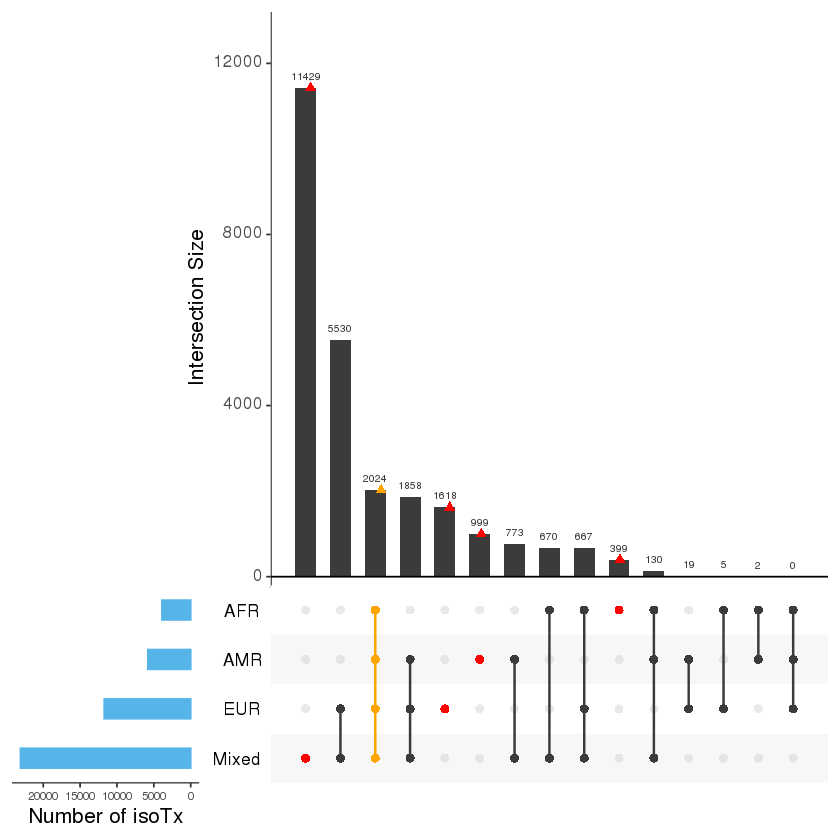

In [25]:
library(UpSetR)

upset(fromList(tx), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of isoTx",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","Mixed"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("Mixed"),
                          color = "red", active = F)),
      text.scale = c(1.5, 1.5, 1.5, 1, 1.5, 1))

In [26]:
pdf(file="~/project-gandalm/isoform_twas/isoqtl_new/figures/upsetr_isotx.pdf", onefile=F)
upset(fromList(tx), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of isoTx",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","Mixed"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("Mixed"),
                          color = "red", active = F)),
      text.scale = c(1.5, 1.5, 1.5, 1, 1.5, 1))
dev.off()

png 
  2

In [27]:
mixed_gene <- unique(mixed_sig$Gene)
eur_gene <- unique(eur_sig$Gene)
amr_gene <- unique(amr_sig$Gene)
afr_gene <- unique(afr_sig$Gene)

genes <- list(Mixed = mixed_gene,
            EUR = eur_gene,
            AMR = amr_gene,
            AFR = afr_gene)

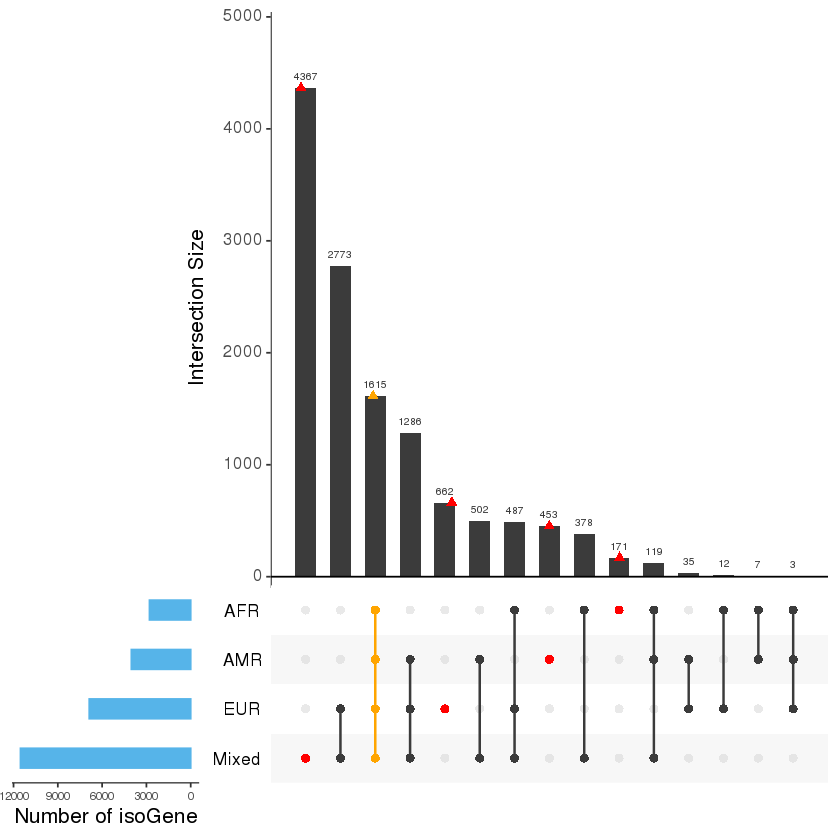

In [28]:
upset(fromList(genes), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of isoGene",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","Mixed"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("Mixed"),
                          color = "red", active = F)),
      text.scale = c(1.5, 1.5, 1.5, 1, 1.5, 1))

In [29]:
pdf(file="~/project-gandalm/isoform_twas/isoqtl_new/figures/upsetr_isogene.pdf", onefile=F)
upset(fromList(genes), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of isoGene",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","Mixed"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("Mixed"),
                          color = "red", active = F)),
      text.scale = c(1.5, 1.5, 1.5, 1, 1.5, 1))
dev.off()

png 
  2

### 6:

### 7: isoGene types

In [30]:
annot <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table=F)

In [31]:
mixed_sig <- mixed_sig %>% left_join(annot, by=c("Gene"="ensg"))

In [33]:
dim(mixed_sig)

[1] 23081    26

In [34]:
mixed_sig <- mixed_sig[,c(1:14, 25, 26)]
colnames(mixed_sig)[15] <- "gene_type"
colnames(mixed_sig)[16] <- "gene_name"

In [35]:
write.table(mixed_sig, "~/project-gandalm/isoform_twas/isoqtl_new/results/mixed_perm_70hcp/sig_pheno_gene_info.txt", col.names=T, row.names=F, quote=F, sep="\t")

In [36]:
mixed_sig <- mixed_sig[!duplicated(mixed_sig$Gene),]

In [37]:
dim(mixed_sig)

[1] 11527    16

In [38]:
sort(table(mixed_sig$gene_type))


                         IG_V_gene                    IG_V_pseudogene 
                                 1                                  1 
              processed_transcript                    rRNA_pseudogene 
                                 1                                  1 
                    sense_intronic                          TR_C_gene 
                                 1                                  1 
                         TR_V_gene                    TR_V_pseudogene 
                                 1                                  1 
                          vaultRNA                 unitary_pseudogene 
                                 1                                  3 
                         antisense                            lincRNA 
                                 5                                 10 
            polymorphic_pseudogene                         pseudogene 
                                11                                 20 
     

In [39]:
type_vec <- c("protein_coding","lncRNA","processed_pseudogene", "transcribed_unprocessed_pseudogene", "Other")
df <- data.frame("type"=type_vec, "prop"=c(8104, 2230, 334, 238, (11527-8104-2230-334-238))/11527)
df

type,prop
<fct>,<dbl>
protein_coding,0.70304502
lncRNA,0.19345884
processed_pseudogene,0.02897545
transcribed_unprocessed_pseudogene,0.02064718
Other,0.05387351


In [40]:
df$type <- factor(df$type, levels = c("protein_coding","lncRNA","processed_pseudogene", "transcribed_unprocessed_pseudogene", "Other"))

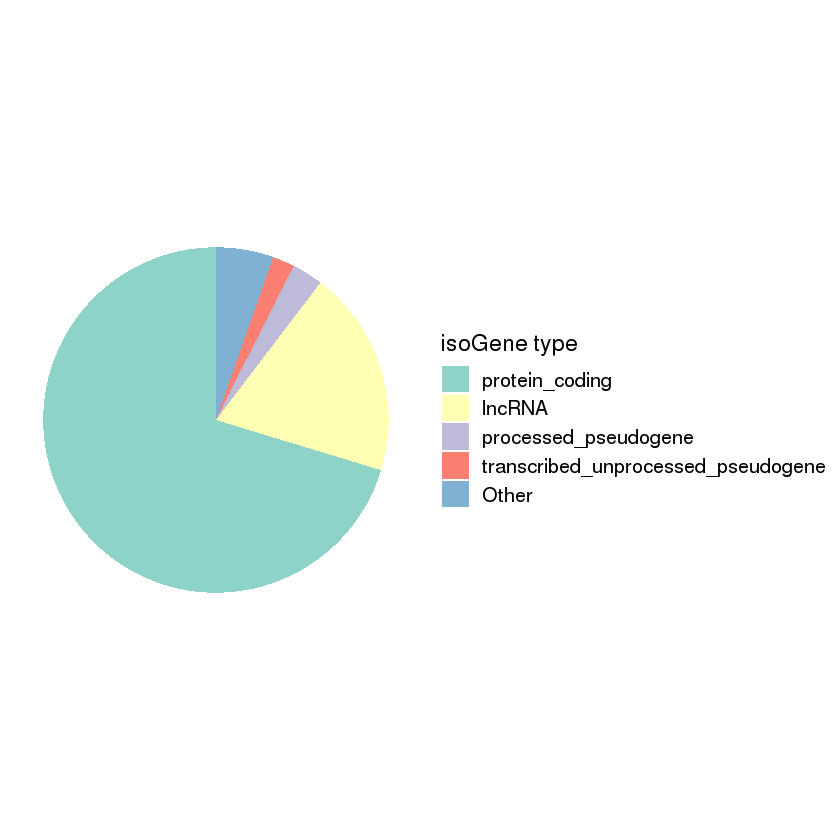

In [45]:
library(formattable)

p <- ggplot(df, aes(x="", y=prop, fill=type)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
#   geom_text(aes(x="", y=pos, label=percent(prop)), size=4) +
#   facet_wrap(~group) +
  theme_void() +
  theme(legend.text = element_text(size=12),
        legend.title = element_text(size=14)) +
  scale_fill_brewer(palette = "Set3") +
  labs(fill="isoGene type")

#   geom_text_repel(aes(x = 1.6, y = pos, label = percent(prop)), 
#                     nudge_x = .3, 
#                     segment.size = .7, 
#                     show.legend = FALSE)
p 

In [42]:
ggsave("~/project-gandalm/isoform_twas/isoqtl_new/figures/isogene_type.png", p, height=4, width=8)